In [2]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
#from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

In [3]:
# Import CSV of Disneyland reviews
reviews_file = "Resources/DisneyReviews.csv"
reviewsdf = pd.read_csv(reviews_file, encoding='latin-1')
reviewsdf.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
reviewsdf.loc[reviewsdf['Branch']=='Disneyland_California',:]


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California
...,...,...,...,...,...,...
29021,1563280,5,missing,United States,I have taken my music groups to Disneyland for...,Disneyland_California
29022,1540854,5,missing,United States,This is definitely the Happiest Place on Earth...,Disneyland_California
29023,1534364,1,missing,United States,"never again...what a horrible experience, the ...",Disneyland_California
29024,1506324,5,missing,United States,We take a long weekend trip to California each...,Disneyland_California


In [5]:
#reviewsdf.drop("Branch"('Disneyland_HongKong','Disneyland_Paris'), inplace=True)
reviewsdf = reviewsdf.loc[(reviewsdf['Branch']=='Disneyland_California')&(reviewsdf['Year_Month']!='missing')]
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California
...,...,...,...,...,...,...
28499,92494269,1,2010-12,Canada,"Myself, along with my two chidren ages 8 and 1...",Disneyland_California
28500,92313324,4,2010-12,United States,We love Disneyland so much that we go there of...,Disneyland_California
28501,91799423,5,2010-10,Australia,As this was part of our international conferen...,Disneyland_California
28502,91657810,4,2010-12,Australia,we spent one day at disneyland withmy sister ...,Disneyland_California


In [6]:
#Drop Data before September, 2014 through April 30, 2019 inclusive
reviewsdf['YYYY-MM'] = pd.to_datetime(reviewsdf['Year_Month'], format='%Y-%m', errors='coerce').dropna()

In [7]:
reviewsdf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04-01
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04-01
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,2019-05-01
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04-01
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04-01
...,...,...,...,...,...,...,...
28499,92494269,1,2010-12,Canada,"Myself, along with my two chidren ages 8 and 1...",Disneyland_California,2010-12-01
28500,92313324,4,2010-12,United States,We love Disneyland so much that we go there of...,Disneyland_California,2010-12-01
28501,91799423,5,2010-10,Australia,As this was part of our international conferen...,Disneyland_California,2010-10-01
28502,91657810,4,2010-12,Australia,we spent one day at disneyland withmy sister ...,Disneyland_California,2010-12-01


In [8]:
mydf = reviewsdf[(reviewsdf['YYYY-MM'] >= "2014-09-01") & (reviewsdf['YYYY-MM'] <= "2019-04-30")]
mydf

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04-01
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04-01
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04-01
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04-01
9625,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04-01
...,...,...,...,...,...,...,...
21112,226750628,5,2014-9,United States,The day after the holiday was the best day to ...,Disneyland_California,2014-09-01
21134,226493578,4,2014-9,United States,Liked: For a holiday weekend lines werent craz...,Disneyland_California,2014-09-01
21137,226470511,5,2014-9,United States,I have been to LA a lot of times already but l...,Disneyland_California,2014-09-01
21160,226296839,5,2014-9,United States,"I just got back from Disneyland and, as always...",Disneyland_California,2014-09-01


In [9]:
mydf.drop_duplicates(subset='Review_Text', inplace=True, keep='first')
mydf

C:\Users\sarma\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,YYYY-MM
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,2019-04-01
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04-01
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04-01
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04-01
9625,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04-01
...,...,...,...,...,...,...,...
21112,226750628,5,2014-9,United States,The day after the holiday was the best day to ...,Disneyland_California,2014-09-01
21134,226493578,4,2014-9,United States,Liked: For a holiday weekend lines werent craz...,Disneyland_California,2014-09-01
21137,226470511,5,2014-9,United States,I have been to LA a lot of times already but l...,Disneyland_California,2014-09-01
21160,226296839,5,2014-9,United States,"I just got back from Disneyland and, as always...",Disneyland_California,2014-09-01


In [10]:
mydf['Review_Text'].values[2:3]


array(["Having been to the Florida location numerous times over the years I didn't know how this one would compare. The much smaller footprint made it quicker easier to get from ride to ride. The Cinderella's castle was much much smaller, but also being renovated. Many of the rides were identical, while some were notably different. The Indiana Jones Ride (which FL does not have) was awesome. Space Mountain was much more puke worthy. It's a Small World was way more beautiful from the exterior. They had several of the old rides that FL doesn't have (like Pinocchio and Mr. Toad). I LOVE how their fast passes worked... it was easy to use and we were able to use them back to back on rides, fast passing almost everything we wanted to ride. We went the first week of April and while crowded, I didn't think it was too bad. We were only in the park for like 7 hours and I do wish I'd had about 3 more hours to do everything."],
      dtype=object)

In [11]:
mydf.describe()

,Review_ID,Rating
count,1.090500e+04,10905.000000
mean,4.121397e+08,4.375516
std,1.227936e+08,1.004359
min,2.259974e+08,1.000000
25%,3.066742e+08,4.000000
50%,3.903353e+08,5.000000
75%,5.091599e+08,5.000000
max,6.708014e+08,5.000000


In [12]:
mydf.Review_ID.value_counts()

670801367    1
331123994    1
331518441    1
331424888    1
331384321    1
            ..
468315822    1
468195156    1
468179416    1
468128367    1
225997408    1
Name: Review_ID, Length: 10905, dtype: int64

In [13]:
timeline = mydf['Year_Month'].str.split('-')
timeline

9620     [2019, 4]
9621     [2019, 4]
9623     [2019, 4]
9624     [2019, 4]
9625     [2019, 4]
           ...    
21112    [2014, 9]
21134    [2014, 9]
21137    [2014, 9]
21160    [2014, 9]
21179    [2014, 9]
Name: Year_Month, Length: 10905, dtype: object

In [14]:
mydf['Year'] = timeline.str[0]
mydf['Month'] = timeline.str[1]

C:\Users\sarma\AppData\Local\Temp/ipykernel_6628/3238927131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Year'] = timeline.str[0]
C:\Users\sarma\AppData\Local\Temp/ipykernel_6628/3238927131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Month'] = timeline.str[1]


In [15]:
mydf.drop(["Year_Month"], axis = 1, inplace = True)
mydf.head()

C:\Users\sarma\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,YYYY-MM,Year,Month
9620,670801367,5,United States,This place has always been and forever will be...,Disneyland_California,2019-04-01,2019,4
9621,670760708,5,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,2019-04-01,2019,4
9623,670544335,5,United States,Having been to the Florida location numerous t...,Disneyland_California,2019-04-01,2019,4
9624,670472278,5,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,2019-04-01,2019,4
9625,670382191,5,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,2019-04-01,2019,4


In [16]:
year_viz1 = mydf.groupby('Year', as_index=False).agg({'Rating':'count'})
year_viz1

,Year,Rating
0,2014,1010
1,2015,3239
2,2016,2800
3,2017,2064
4,2018,1501
5,2019,291


<function matplotlib.pyplot.show(close=None, block=None)>

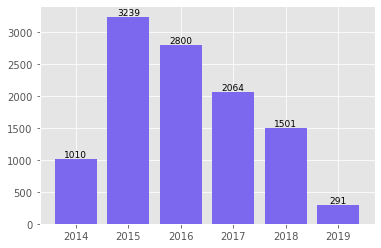

In [17]:
# Data visualization of 'Ratings' vs 'Year'
x = year_viz1['Year']
y = year_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

<AxesSubplot:xlabel='Year', ylabel='count'>

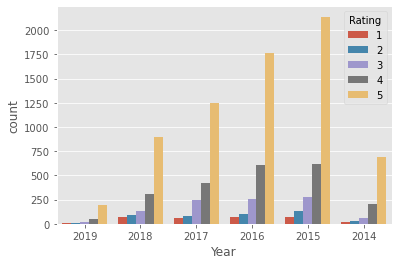

In [18]:
sns.countplot(data = mydf, x = 'Year', hue = 'Rating')

In [19]:
month_viz1 = mydf.groupby('Month', as_index=False).agg({'Rating':'count'})
month_viz1

,Month,Rating
0,1,760
1,10,1150
2,11,774
3,12,983
4,2,704
5,3,861
6,4,875
7,5,890
8,6,941
9,7,995


<function matplotlib.pyplot.show(close=None, block=None)>

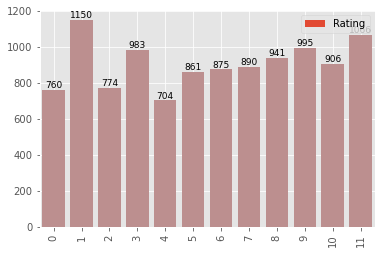

In [24]:
# Data Visualization of 'Month' vs total'Ratings'
x = month_viz1['Month']
y = month_viz1['Rating']
month_viz1.plot(kind="bar")
plt.bar(x, y, color = 'rosybrown')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [21]:
#month_viz2 = mydf.groupby('Month', as_index=False).agg({'Rating:'avg'})
month_viz2 = mydf.groupby('Month', as_index=False).agg({'Rating':'mean'}).sort_values('Rating')
month_viz2

,Month,Rating
1,10,4.255652
5,3,4.277584
0,1,4.322368
4,2,4.328125
3,12,4.346897
7,5,4.378652
6,4,4.388571
8,6,4.393199
9,7,4.409045
10,8,4.430464


<function matplotlib.pyplot.show(close=None, block=None)>

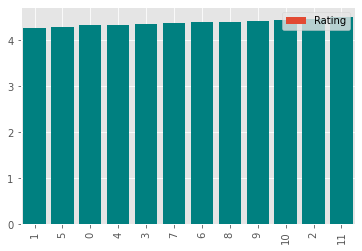

In [22]:
# Data Visualization of 'Month' vs 'Ratings'
x = month_viz2['Month']
y = month_viz2['Rating']
month_viz2.plot(kind="bar")
plt.bar(x, y, color = 'teal')

plt.show

In [23]:
colors = ['#A8A7A8', '#CC527A',  '#363636', '#E8175D', '#474747' ]

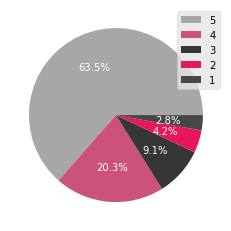

In [24]:
# star distribution from high(5) to low (1)
star = mydf["Rating"].value_counts()


plt.pie(x = star, autopct='%1.1f%%', textprops=dict(color='white'), colors = colors)

plt.legend(labels = star.index)
plt.title=('Reveiws')

plt.show()